In [1]:
# -*- coding: utf-8 -*-

### 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
[Step 1 ~ 4] 데이터 준비 
'''
# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv(r'C:\Users\USER\Downloads\5674-833_4th\part7\auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# horsepower 열의 자료형 변경 (문자열 ->숫자)
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

# ndf 데이터를 train data 와 test data로 구분(7:3 비율)
X=ndf[['weight']]  #독립 변수 X
y=ndf['mpg']     #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)   
print('\n')


'''
Step 5: 비선형회귀분석 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 필요한 모듈 가져오기 
from sklearn.linear_model import LinearRegression      #선형회귀분석
from sklearn.preprocessing import PolynomialFeatures   #다항식 변환

# 다항식 변환 
poly = PolynomialFeatures(degree=2)               #2차항 적용
X_train_poly=poly.fit_transform(X_train)     #X_train 데이터를 2차항으로 변형

print('원 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)  
print('\n')

# train data를 가지고 모형 학습
pr = LinearRegression()   
pr.fit(X_train_poly, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
X_test_poly = poly.fit_transform(X_test)       #X_test 데이터를 2차항으로 변형
r_square = pr.score(X_test_poly,y_test)
print(r_square)
print('\n')

# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label='Train Data')  # 데이터 분포
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
X_ploy = poly.fit_transform(X)
y_hat = pr.predict(X_ploy)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y, label="y")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()

SyntaxError: invalid character '‘' (U+2018) (3607069485.py, line 14)

In [1]:
# -*- coding: utf-8 -*-

import pandas as pd

# 판다스 DataFrame() 함수로 데이터프레임 변환. 변수 df1, df2에 저장 
data1 = {'name' : [ 'Jerry', 'Riah', 'Paul'],
         'algol' : [ "A", "A+", "B"],
         'basic' : [ "C", "B", "B+"],
          'c++' : [ "B+", "C", "C+"]}

data2 = {'c0':[1,2,3], 
         'c1':[4,5,6], 
         'c2':[7,8,9], 
         'c3':[10,11,12], 
         'c4':[13,14,15]}

df1 = pd.DataFrame(data1)
df1.set_index('name', inplace=True)      #name 열을 인덱스로 지정
print(df1)
print('\n')

df2 = pd.DataFrame(data2)
df2.set_index('c0', inplace=True)        #c0 열을 인덱스로 지정
print(df2)

# df1을 'sheet1'으로, df2를 'sheet2'로 저장 (엑셀파일명은 "df_excelwriter.xlsx")
writer = pd.ExcelWriter("./df_excelwriter.xlsx")
df1.to_excel(writer, sheet_name="sheet1")
df2.to_excel(writer, sheet_name="sheet2")
writer.save()

      algol basic c++
name                 
Jerry     A     C  B+
Riah     A+     B   C
Paul      B    B+  C+


    c1  c2  c3  c4
c0                
1    4   7  10  13
2    5   8  11  14
3    6   9  12  15


AttributeError: 'OpenpyxlWriter' object has no attribute 'save'

In [ ]:
def 데이터프레임파악하기(df):
    print(df.shape)
    print("==================")
    print(df.info())
    print("==================")
    print(df.describe())
    print("==================")
    print(df.count())
    print("==================")


데이터프레임파악하기(df)

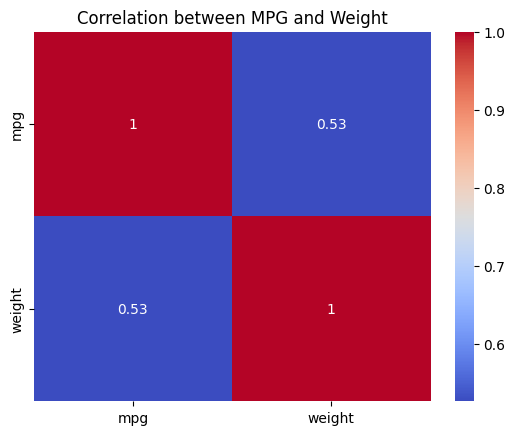

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 예시 DataFrame 생성
data = {
    'mpg': [21, 22, 23, 24, 25],
    'weight': [3000, 3200, 2800, 3500, 3300]
}
df = pd.DataFrame(data)

# 상관 관계 계산
correlation = df[['mpg', 'weight']].corr()

# 히트맵 그리기
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between MPG and Weight')
plt.show()

       1991  1992  1993  1994  1995  1996  1997  1998  1999  2000  ...  2007  \
South  1186  1310  1444  1650  1847  2055  2244  2153  2393  2664  ...  4031   
North   263   247   221   231   230   213   193   170   186   194  ...   236   

       2008  2009  2010  2011  2012  2013  2014  2015  2016  
South  4224  4336  4747  4969  5096  5171  5220  5281  5404  
North   255   235   237   211   215   221   216   190   239  

[2 rows x 26 columns]




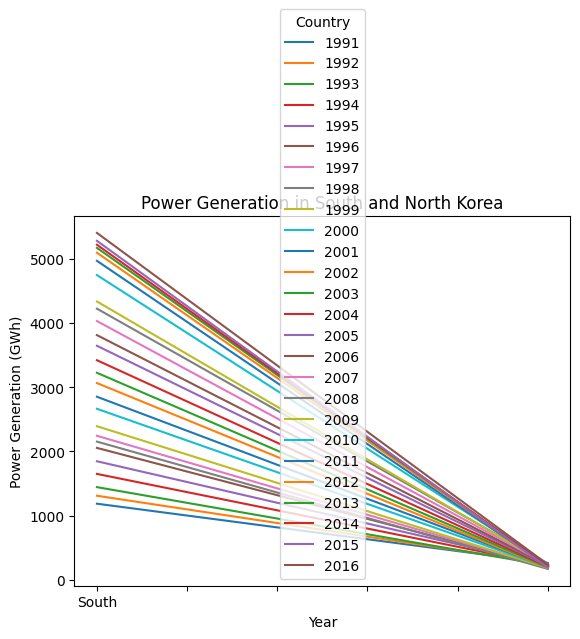

     South North
1991  1186   263
1992  1310   247
1993  1444   221
1994  1650   231
1995  1847   230




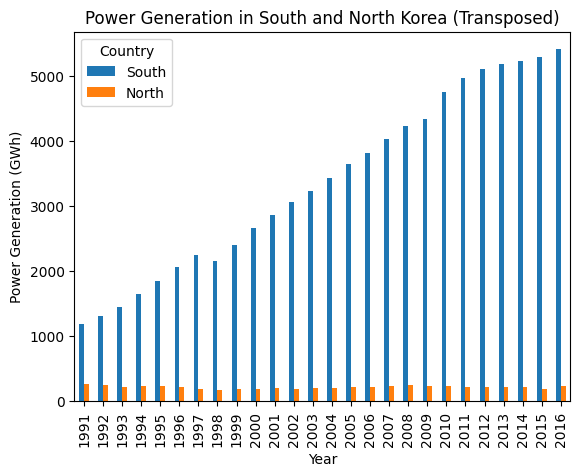

In [3]:
# -*- coding: utf-8 -*-

import pandas as pd
import matplotlib.pyplot as plt

# 엑셀 파일을 읽어 DataFrame으로 변환
df = pd.read_excel(r'C:\Users\USER\Downloads\03_데이터분석\파이썬머신러닝판다스데이터분석\part3\남북한발전전력량.xlsx', engine='openpyxl')  

# 남한, 북한 발전량 합계 데이터만 추출
df_ns = df.iloc[[0, 5], 3:]
df_ns.index = ['South', 'North']  # 행 인덱스 변경
df_ns.columns = df_ns.columns.map(int)  # 열 이름의 자료형을 정수형으로 변경

# DataFrame 확인
print(df_ns.head())
print('\n')

# 선 그래프 그리기
df_ns.plot()
plt.title('Power Generation in South and North Korea')
plt.xlabel('Year')
plt.ylabel('Power Generation (GWh)')
plt.legend(title='Country')
plt.show()  # 그래프 표시

# 행, 열 전치하여 막대 그래프 그리기
tdf_ns = df_ns.T
print(tdf_ns.head())
print('\n')

# 막대 그래프 그리기
tdf_ns.plot(kind='bar')
plt.title('Power Generation in South and North Korea (Transposed)')
plt.xlabel('Year')
plt.ylabel('Power Generation (GWh)')
plt.legend(title='Country')
plt.show()  # 그래프 표시


       1991  1992  1993  1994  1995  1996  1997  1998  1999  2000  ...  2007  \
South  1186  1310  1444  1650  1847  2055  2244  2153  2393  2664  ...  4031   
North   263   247   221   231   230   213   193   170   186   194  ...   236   

       2008  2009  2010  2011  2012  2013  2014  2015  2016  
South  4224  4336  4747  4969  5096  5171  5220  5281  5404  
North   255   235   237   211   215   221   216   190   239  

[2 rows x 26 columns]




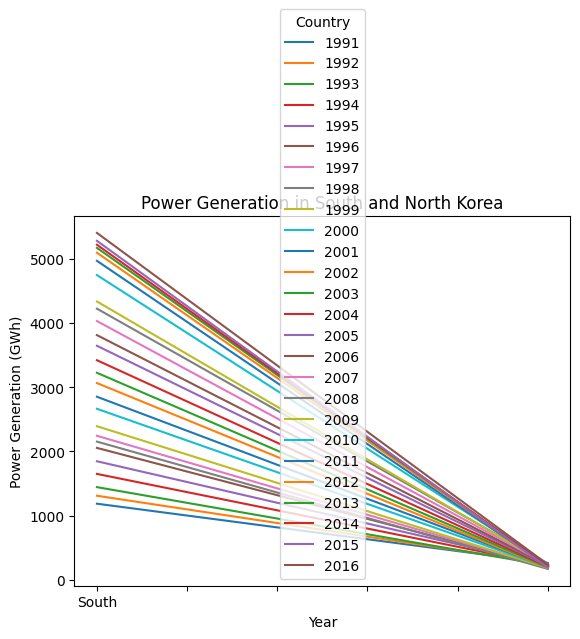

     South North
1991  1186   263
1992  1310   247
1993  1444   221
1994  1650   231
1995  1847   230




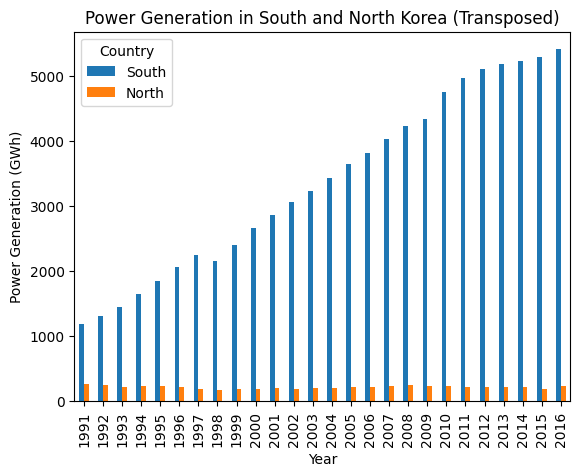

TypeError: no numeric data to plot

In [4]:
# -*- coding: utf-8 -*-

import pandas as pd
import matplotlib.pyplot as plt

# 엑셀 파일을 읽어 DataFrame으로 변환
df = pd.read_excel(r'C:\Users\USER\Downloads\03_데이터분석\파이썬머신러닝판다스데이터분석\part3\남북한발전전력량.xlsx', engine='openpyxl')  

# 남한, 북한 발전량 합계 데이터만 추출
df_ns = df.iloc[[0, 5], 3:]
df_ns.index = ['South', 'North']  # 행 인덱스 변경
df_ns.columns = df_ns.columns.map(int)  # 열 이름의 자료형을 정수형으로 변경

# DataFrame 확인
print(df_ns.head())
print('\n')

# 선 그래프 그리기
df_ns.plot()
plt.title('Power Generation in South and North Korea')
plt.xlabel('Year')
plt.ylabel('Power Generation (GWh)')
plt.legend(title='Country')
plt.show()  # 그래프 표시

# 행, 열 전치하여 막대 그래프 그리기
tdf_ns = df_ns.T
print(tdf_ns.head())
print('\n')

# 막대 그래프 그리기
tdf_ns.plot(kind='bar')
plt.title('Power Generation in South and North Korea (Transposed)')
plt.xlabel('Year')
plt.ylabel('Power Generation (GWh)')
plt.legend(title='Country')
plt.show()  # 그래프 표시

# 각 열에 대한 히스토그램 개별적으로 그리기
tdf_ns.plot(kind='hist', alpha=0.5, bins=20)
plt.title('Histogram of Power Generation in South and North Korea')
plt.xlabel('Power Generation (GWh)')
plt.ylabel('Frequency')
plt.legend(title='Country')
plt.show()  # 그래프 표시

# 또는, 각 열의 히스토그램을 개별적으로 그리기
for column in tdf_ns.columns:
    tdf_ns[column].plot(kind='hist', alpha=0.5, bins=20, title=f'Histogram of {column}')
    plt.xlabel('Power Generation (GWh)')
    plt.ylabel('Frequency')
    plt.show()  # 그래프 표시
